In [ ]:
import os
import yaml
import corner
import uproot
import numpy as np
import vallog as vl
import matplotlib.pyplot as plt

In [6]:
msg = vl.Logger()

In [7]:
input_file: str = input("path/to/root/file: ")
if input_file == "":
    input_file = "../data/modelgen-output/1/ntuple.0.0.root"
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File {input_file} does not exist.")
if "root" not in input_file:
    raise ValueError(f"File {input_file} is not a ROOT file.")

msg.log(f"Inspecting file {input_file}", vl.info)

[Info]                  Inspecting file
                        ../data/modelgen-output/1/ntuple.0.0.root


In [21]:
scan_data = uproot.open(input_file + ":susy")
scan_data.show()
valid_models = scan_data["SP_err_num"].array(library="np")
valid_models

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
model                | double                   | AsDtype('>f8')
Maywarning           | double                   | AsDtype('>f8')
IN_err_tachyon       | double                   | AsDtype('>f8')
IN_err_tachyon_sb... | double                   | AsDtype('>f8')
IN_err_tachyon_stop  | double                   | AsDtype('>f8')
IN_err_tachyon_sn... | double                   | AsDtype('>f8')
IN_err_tachyon_A0    | double                   | AsDtype('>f8')
IN_err_tachyon_stau  | double                   | AsDtype('>f8')
IN_err_tachyon_hpm   | double                   | AsDtype('>f8')
IN_err_tachyon_m3... | double                   | AsDtype('>f8')
IN_err_tachyon_other | double                   | AsDtype('>f8')
IN_err_m3sq_problem  | double                   | AsDtype('>f8')
IN_err_stop_LSP      | double                   | AsDtype(

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
msg.log(f"number of generated models: {scan_data["model"].num_entries}", vl.info)


[Info]                  number of generated models: 1000


In [10]:
scan_config_file = input_file.replace(os.path.basename(input_file), "scan_config.yaml")
msg.log(f"Scan config file: {scan_config_file}", vl.info)
with open(scan_config_file, "r") as f:
    config = yaml.safe_load(f)
input_parameters = config["parameters"]
msg.log(f"Input parameters: {input_parameters.keys()}", vl.info)

[Info]                  Scan config file:
                        ../data/modelgen-output/1/scan_config.yaml
[Info]                  Input parameters: dict_keys(['AT', 'Ab', 'Atau', 'M_1',
                        'M_2', 'M_3', 'mHd2', 'mHu2', 'mbR', 'mdR', 'meL', 'meR', 'mqL1', 'mqL3', 'mtR', 'mtauL', 'mtauR', 'muR', 'sgnMu', 'tanb'])


In [11]:
parameter_df = scan_data.arrays(["SP_At", "SP_Ab", "SP_Atau", "SP_M_1", "SP_M_2", "SP_mHd2", "SP_mHu2", "SP_meL", "SP_meR", "SP_tanb_min"], library="pd")


In [ ]:
def plot_parameter(parameter_name: str, data: pd.DataFrame, output_path: str = "plots/") -> None:
    """create a histogramm from a pandas dataframe"""
    plt_colors: list[str] = ["lightseagreen", "crimson", "mediumorchid"]

    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111)

    bins = np.histogram_bin_edges(data[data.keys()[0]], bins=50)

    for i, par in enumerate(data.keys()):
        ax.hist(data[par], bins=bins, color=plt_colors[i], alpha=0.5, label=par.split("#")[0])

    ax.set_xlabel(parameter_name)
    ax.set_ylabel("counts")
    ax.legend()
    fig.tight_layout()

    if not os.path.isdir(output_path):
        os.makedirs(output_path)
    fig.savefig(output_path + parameter_name, dpi=500)

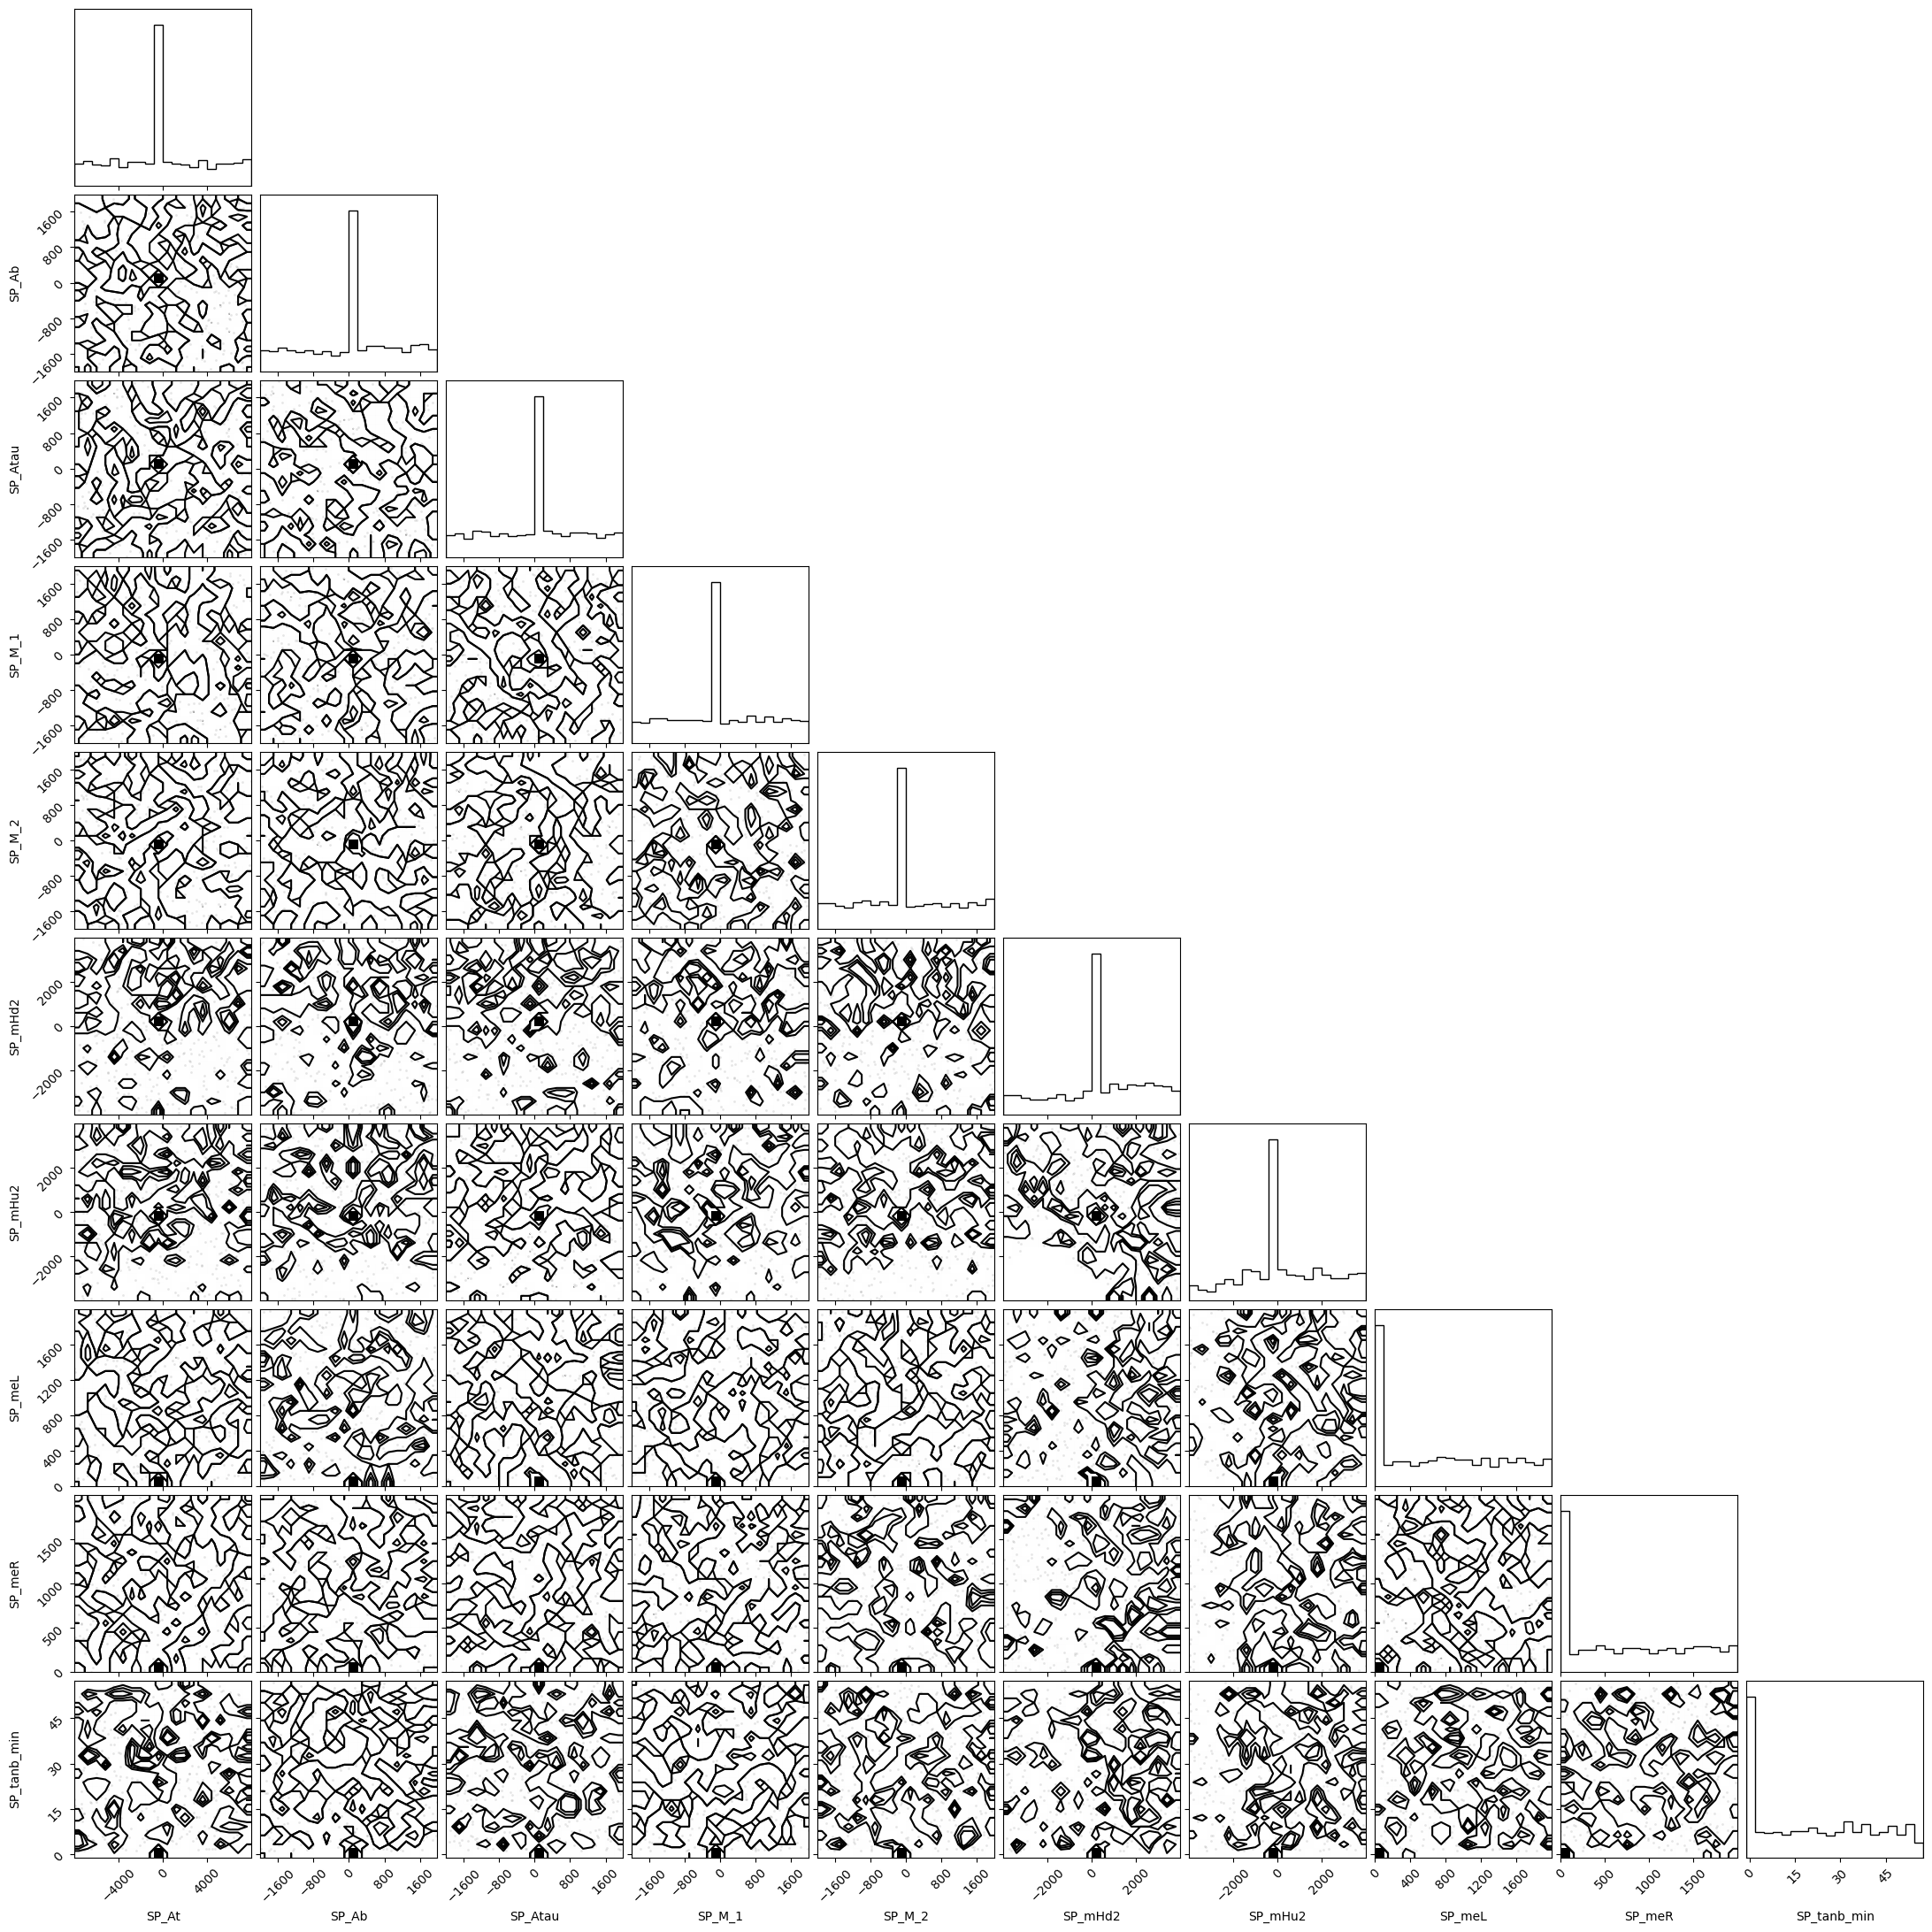

In [12]:
corner_fig = corner.corner(parameter_df, divergences=True, labels=parameter_df.columns)
corner_fig.savefig("corner_plot_root.png")